# Cyber Security And Artificial Intelligence
# HW1

## imports 

In [ ]:
import sys
print(f'install sklearn if not installed')
!{sys.executable} -m pip install sklearn

In [2]:
# math 
import math
import numpy as np
np.random.seed(0)
import pandas as pd
from scipy import stats
from scipy.stats import geom

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec


## EDA

In [ ]:
# Load Dataset

In [3]:
boston = load_boston()

X = boston.data
y = boston.target
columns = list(boston.feature_names)
boston_df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), \
                         columns= columns + ['PRICE'])
print(boston_df[0:10])

|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   PRICE |
|---:|--------:|-----:|--------:|-------:|------:|------:|------:|-------:|------:|------:|----------:|-------:|--------:|--------:|
|  0 | 0.00632 | 18   |    2.31 |      0 | 0.538 | 6.575 |  65.2 | 4.09   |     1 |   296 |      15.3 | 396.9  |    4.98 |    24   |
|  1 | 0.02731 |  0   |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 | 396.9  |    9.14 |    21.6 |
|  2 | 0.02729 |  0   |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |    34.7 |
|  3 | 0.03237 |  0   |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |    33.4 |
|  4 | 0.06905 |  0   |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 |     3 |   222 |      18.7 | 396.9  |    5.33 |    36.2 |
|  5 | 0.02985 |  0   |    2.18 |      0 | 0.458 | 6.43  |  58.7 | 6.

In [4]:
#1. describe the dataset. How many samples does it contain? 
#   How many features? What is the data type for each variable?

amount_of_feature = boston_df.shape[1]-1
amount_of_sampels = boston_df.shape[0]
print('The amount of sampels is: ' + str(amount_of_sampels))
print('The amount of feature is: ' + str(amount_of_feature))
print('data type for each feature:')
boston_df.info(verbose=True)

The amount of sampels is: 506
The amount of feature is: 13
data type for each feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
#2. Produce a histogram and a boxplot of the nitric oxides concentration. 
#   describe the distribution.
NOX_feature = boston_df['NOX'].to_list()

nox_mean = np.mean(NOX_feature)
nox_median = np.median(NOX_feature)
nox_std = np.std(NOX_feature)

print(f'mean of NOX feature {nox_mean}')
print(f'median of NOX feature {nox_median}')
print(f'std of NOX feature {nox_std}')

mean of NOX feature 0.5546950592885376
median of NOX feature 0.538
std of NOX feature 0.11576311540656137


#### Histogram of the data:

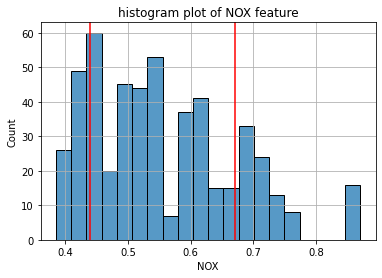

In [6]:
plt.figure()
ax = sns.histplot(x="NOX", data=boston_df, bins=20)
plt.title('histogram plot of NOX feature')
plt.grid()
plt.axvline(x = nox_mean - nox_std, color= 'r')
plt.axvline(x = nox_mean + nox_std, color= 'r')


we can see from the histogram plot that most of the data in the range 
of [mean-std,mean+std]
in our case the mean is 0.55 and the std is 0.11 -> [0.44,0.66]


#### Boxplot of the data:

* The box plot below will show the precentiles:
    1. the first line describe the 0% percentile (the min value)
    2. the secound line describe the 25% percentile (Q1)
    3. the third line describe the 50% percentile (median) 
    4. the forth line describe the 75% percentile (Q3) 
    5. the fivth line describe the 100% percentile (the max value) 
* From our box plot we can infer that the IQR(inter quartile range) is between ~0.44 to ~0.66 (which correlates with the  conclusions from the histogram) 

Text(0.5, 1.0, 'box plot of NOX feature')

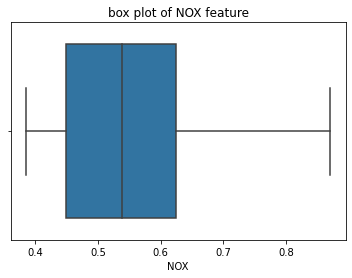

In [7]:
plt.figure()
ax = sns.boxplot(x="NOX", data=boston_df)
plt.title('box plot of NOX feature')

# different graph
# swaemplot
# vilonplot
# swarmplot



Text(0.5, 1.0, 'Correlation matrix of all the features')

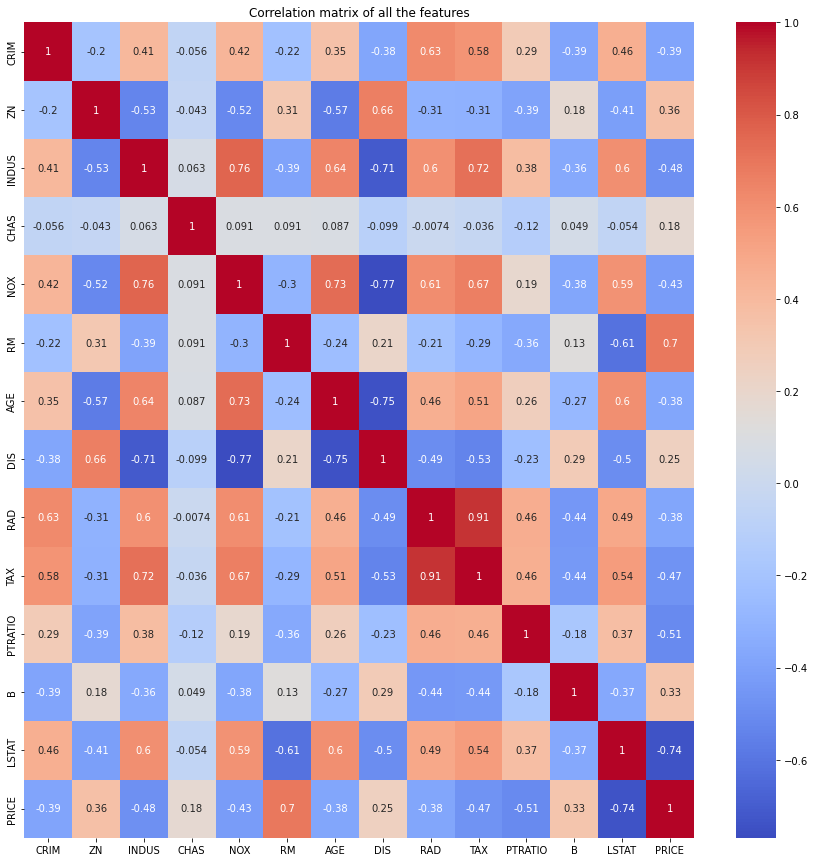

In [8]:
#3. Produce a correlation matrix of all the features. 
#   Are there any correlated features?

plt.figure(figsize=(15, 15))
sns.heatmap(boston_df.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation matrix of all the features')

#### Conclusions regarding the correlation matrix heatmap

In [9]:
corr_array = boston_df.corr().to_numpy()
np.fill_diagonal(corr_array, 0)
max_corr_row_col = np.where(corr_array == np.max(corr_array))[0]
min_corr_row_col = np.where(corr_array == np.min(corr_array))[0]

boston_df_col = boston_df.columns.to_numpy()
min_cor_features = boston_df_col[min_corr_row_col].tolist()
max_cor_features = boston_df_col[max_corr_row_col].tolist()

#string = 'The max correlation is between each feature and itself in the digonal'
#print(string)

string = 'The min corroletion found was between feature ' + min_cor_features[0] + ' to feature ' \
+ min_cor_features[1]
print(string)

string = 'The max corroletion found was between feature ' + max_cor_features[0] + ' to feature ' \
+ max_cor_features[1]
print(string)

string = 'The unusual feature is the CHAS feature; We can notice in the heat map ' + \
         'that it has very low correlation with other features'
print(string)

The min corroletion found was between feature NOX to feature DIS
The max corroletion found was between feature RAD to feature TAX
The unusual feature is the CHAS feature; We can notice in the heat map that it has very low correlation with other features


JointPlot of the pair of features with the highest correlation (positive)


Text(0.5, 0.98, 'Joint plot between RAD, TAX')

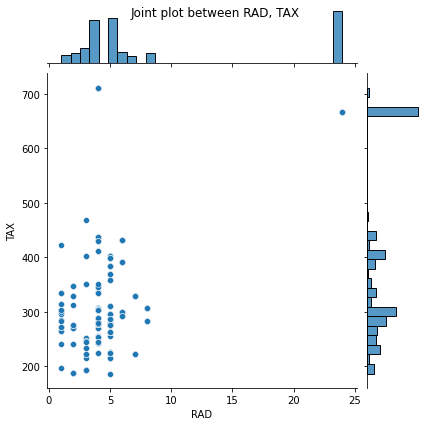

In [10]:
#4. Select the 2 pairs of features with the highest correlation
# (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
print(f'JointPlot of the pair of features with the highest correlation (positive)')
ax= sns.jointplot(x=boston_df[max_cor_features[0]], y=boston_df[max_cor_features[1]],\
              marginal_kws=dict(bins=30))
ax.fig.suptitle('Joint plot between ' + max_cor_features[0]+ ', '+ max_cor_features[1])

JointPlot of the pair of features with the highest correlation (negative)


Text(0.5, 0.98, 'Joint plot between NOX, DIS')

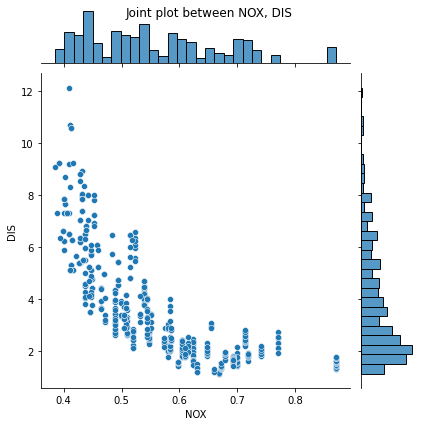

In [11]:
print(f'JointPlot of the pair of features with the highest correlation (negative)')
ax= sns.jointplot(x=boston_df[min_cor_features[0]], y=boston_df[min_cor_features[1]],\
              marginal_kws=dict(bins=30))
ax.fig.suptitle('Joint plot between ' + min_cor_features[0]+ ', '+ min_cor_features[1])

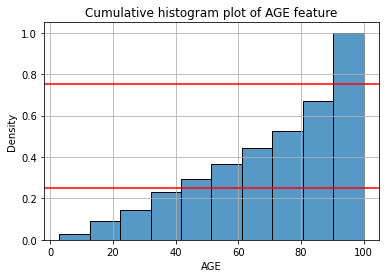

In [12]:
#5. Produce a cumulative histogram of the age variable and 
#   add two horizontal lines on the first and third quartile (on the cumulative count)

plt.figure()
ax = sns.histplot(x="AGE", data=boston_df, cumulative=True, stat='density')
plt.title('Cumulative histogram plot of AGE feature')
cumsum = boston_df['AGE'].to_numpy().cumsum()
plt.axhline(y= 0.25, color = 'r')
plt.axhline(y= 0.75, color = 'r')
plt.grid()

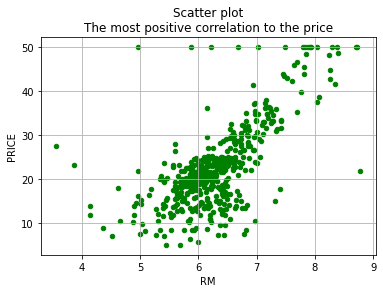

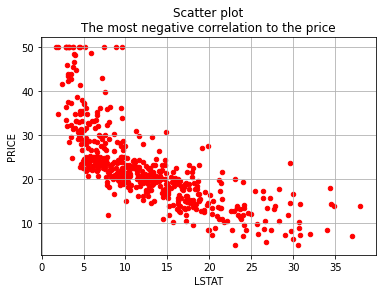

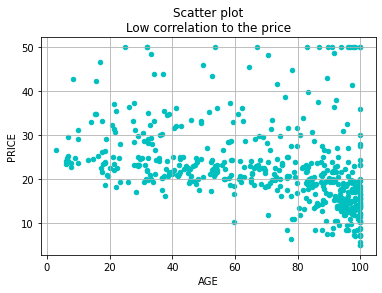

In [13]:
#6. Identify and report 2 “interesting” trends in the data. 
#   No need to provide statistical confidence at this point. 

boston_df.plot.scatter(x='RM', y='PRICE', c = 'g')
plt.title('Scatter plot\nThe most positive correlation to the price')
plt.grid()

boston_df.plot.scatter(x='LSTAT', y='PRICE', color = 'r')
plt.title('Scatter plot\nThe most negative correlation to the price')
plt.grid()

boston_df.plot.scatter(x='AGE', y='PRICE', color = 'c')
plt.title('Scatter plot\nLow correlation to the price')
plt.grid()